#Building a training data set

The aim of this script is to read data from the MBED accelerometer and a pressure sensor to build a training data set.

First, individual events will be recorded using the accelerometer and pressure sensor. The events will be saved in the matrix ${\bf e_{M}}$. The matrix will have four columns, acceleration in $x_{N}, y_{N}, z_{N}$ and pressure $p_{N}$, and it will have $N$ rows.

$$
{\rm event~matrix:~~~} {\bf e_{M}}~=~\left[
\begin{matrix}
x_{1} & y_{1} & z_{1} & p_{1}\\
x_{2} & y_{2} & z_{2}& p_{2}\\
\vdots & \vdots & \vdots & \vdots\\ 
x_{N} & y_{N} & z_{N} & p_{N}\\
\end{matrix}
\right]
$$

Each matrix will be exported into a file with the header indicating the type of event, which are encoded as follows:

```
walk = 0
stand = 1
sit down = 2
lie down = 3
fall = 4
motionless = 5
```

In [1]:
import serial
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import mlpy

#data = open('fall_data_set.dat','w')
#headerLine = ("X \t Y \t Z \n")
#data.write(headerLine)

ser = serial.Serial('/dev/tty.usbmodem1411',9600)

n_timepoints = 100
n_parameters = 3

e_M = np.zeros(shape=(n_timepoints,n_parameters))
it = 0

try:
    while it < n_timepoints:
        #print it
        try:
            line = ser.readline()   
            line = line.strip() #removes trailing whitespaces at start&end of string   
            buf = np.array([float(val) for val in line.split()])
            if(len(buf)==n_parameters):
                #print buf
                e_M[it] = buf
                it += 1
        except:
            continue 
except:
    pass

plt.plot(e_M)
plt.show()

np.savetxt('test.txt',e_M,header='4')

ser.close()

OSError: [Errno 2] No such file or directory: '/dev/tty.usbmodem1411'

Now, a feature matrix ${\bf X}$ is constructed in which each line contains one event $e_{M}$. The element $a_{M}$ in the accompanying label vector $A$ will indicate what type of event $e_{M}$ is, *e.g.* ``fall`` or ``sit down``.

$$
{\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
e_{1}\\
e_{2}\\
\vdots\\ 
e_{M}\\
\end{matrix}
\right]
$$

$$
{\rm label~vector:~~~} {\bf A}~=~ [a_1, a_2, \cdots a_M]
$$

(50, 3, 200)
[[[ 0.007812  0.003906  0.365967 ...,  0.253662  0.259521  0.248779]
  [ 0.130371  0.123047  0.914551 ...,  0.903809  0.905273  0.916992]
  [ 0.998047  0.998047  0.171875 ...,  0.188965  0.199219  0.218262]]

 [[ 0.366943  0.36499   0.400146 ...,  0.249756  0.359619  0.628662]
  [ 0.949707  0.834961  0.836914 ...,  0.96582   0.979492  0.969238]
  [ 0.123047  0.086914  0.067383 ...,  0.155273  0.036133  0.022217]]

 [[ 0.546631  0.548584  0.483154 ...,  0.525146  0.515381  0.499756]
  [ 0.808594  0.751953  0.877441 ...,  0.875977  0.859375  0.847656]
  [ 0.080078  0.105469  0.066406 ...,  0.144287  0.141357  0.143799]]

 ..., 
 [[ 0.522217  0.526611  0.518311 ...,  0.007812  0.013428  0.029053]
  [ 0.874023  0.879395  0.873047 ...,  0.12085   0.126709  0.103271]
  [ 0.041016  0.06543   0.051758 ...,  1.018555  1.020508  1.022461]]

 [[ 0.406006  0.361572  0.477295 ...,  0.778076  0.770752  0.77417 ]
  [ 0.377686  0.4104    0.677734 ...,  0.640625  0.615234  0.616211]
  [ 0.

ValueError: x and y can be no greater than 2-D

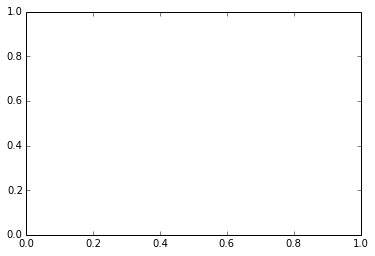

In [3]:
import numpy as np

n_events = 50
n_parameters = 3
n_timepoints = 200

X = np.zeros((n_events,n_parameters,n_timepoints), dtype=float)
A = np.zeros(n_events, dtype=int)

print X.shape

for i in range(n_events):
    
    #read files and create feature matrix X
    filename = 'event'+str(i)+'.txt'
    e_M = np.loadtxt(filename, dtype=float)
    X[i,:,:] = e_M.T
    
    #read file headers and create label vector A
    f = open(filename,'r')
    line = f.readline()
    f.close()
    a_M = line.split()[1]
    A[i] = a_M
    
print X
print A

np.save('X.npy',X)
np.save('A.npy',A)